# Fastai Implementation

In [45]:
from fastai.vision import ImageDataBunch, cnn_learner, models, ClassificationInterpretation
from fastai.metrics import error_rate

In [6]:
data = ImageDataBunch.from_folder("/home/jpnelson/2020/jerms-writing/data/")

/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0, flags=flags)


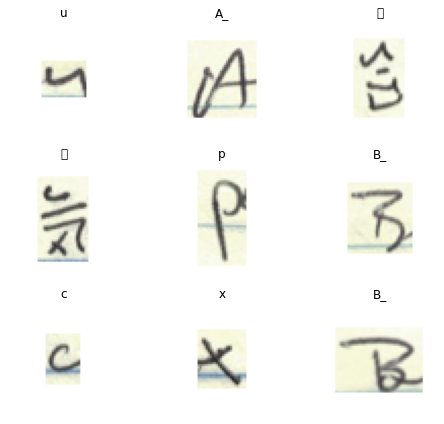

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [15]:
help(models)

Help on package fastai.vision.models in fastai.vision:

NAME
    fastai.vision.models

PACKAGE CONTENTS
    cadene_models
    darknet
    efficientnet
    presnet
    unet
    wrn
    xception
    xresnet
    xresnet2

DATA
    xresnet101 = functools.partial(<function xresnet at 0x7fd89a3...ion=4,...
    xresnet152 = functools.partial(<function xresnet at 0x7fd89a3...ion=4,...
    xresnet18 = functools.partial(<function xresnet at 0x7fd89a3...nsion=1...
    xresnet18_deep = functools.partial(<function xresnet at 0x7fd89a3...la...
    xresnet34 = functools.partial(<function xresnet at 0x7fd89a3...nsion=1...
    xresnet34_deep = functools.partial(<function xresnet at 0x7fd89a3...la...
    xresnet50 = functools.partial(<function xresnet at 0x7fd89a3...nsion=4...
    xresnet50_deep = functools.partial(<function xresnet at 0x7fd89a3...la...

FILE
    /home/jpnelson/2020/py3-env/lib/python3.8/site-packages/fastai/vision/models/__init__.py




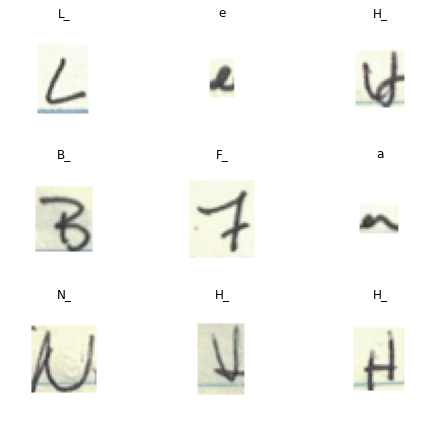

In [10]:
data.show_batch(rows=3, figsize=(7,6))

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [18]:
print(data.classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A_', 'B_', 'C_', 'D_', 'E_', 'F_', 'G_', 'H_', 'I_', 'J_', 'K_', 'L_', 'M_', 'N_', 'O_', 'P_', 'Q_', 'R_', 'S_', 'T', 'T_', 'U_', 'V_', 'W_', 'X_', 'Y_', 'Z_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '合', '気', '道']


In [19]:
data.c

66

In [20]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.912287,4.438357,0.934694,00:36
1,3.252165,4.212705,0.876190,00:37
2,2.652933,3.972440,0.844898,00:43
3,2.245285,3.918319,0.846259,00:45


In [24]:
learn.save("/home/jpnelson/2020/jerms-writing/models/02020-03-26-cnn-stage")

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

In [26]:
losses,idxs = interp.top_losses()

In [27]:
len(data.valid_ds)

735

In [28]:
len(losses)

735

In [29]:
len(idxs)

735

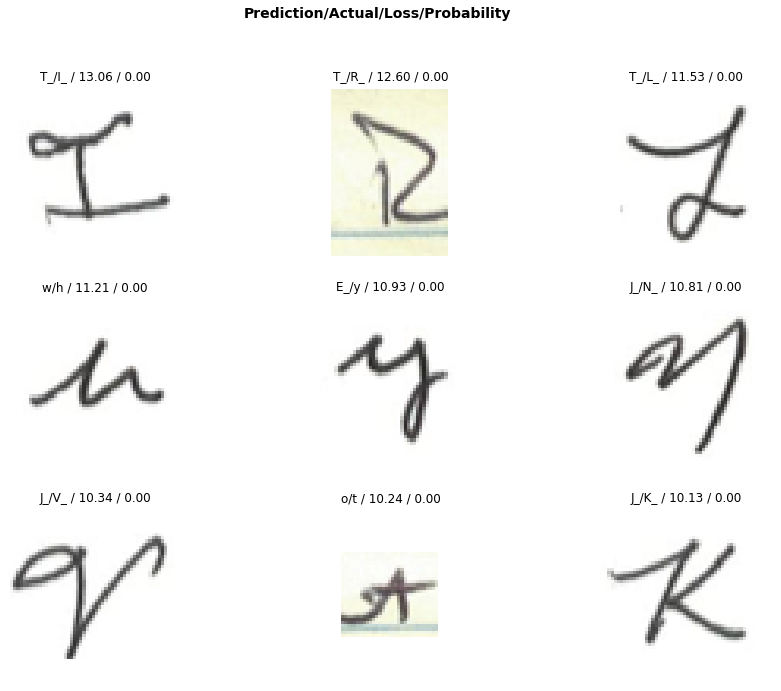

In [30]:
interp.plot_top_losses(9, figsize=(15,11))

/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/jpnelson/2020/py3-env/lib/python3.8/site-packages/matplotl

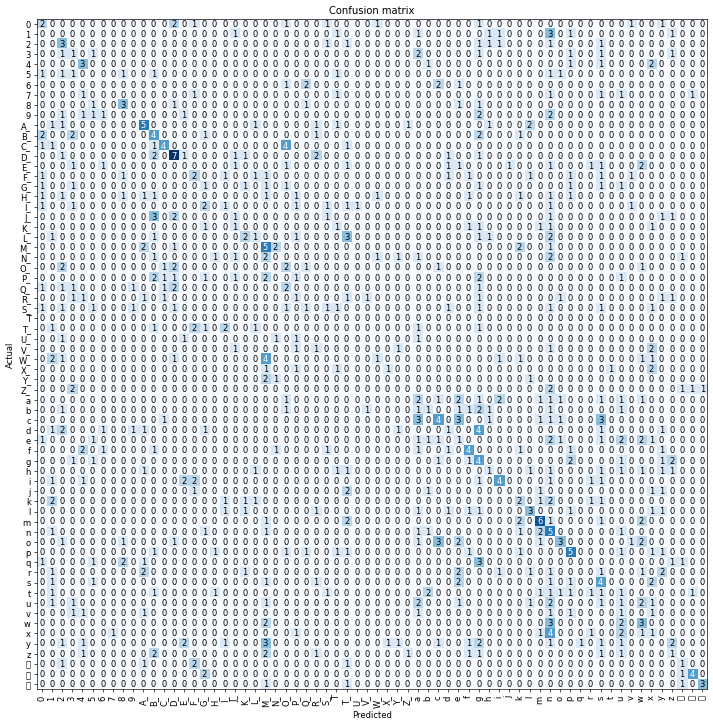

In [33]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [34]:
interp.most_confused(min_val=2)

[('C_', 'O_', 4),
 ('W_', 'M_', 4),
 ('d', 'g', 4),
 ('x', 'n', 4),
 ('1', 'n', 3),
 ('J_', 'B_', 3),
 ('L_', 'T_', 3),
 ('c', 'a', 3),
 ('c', 'e', 3),
 ('c', 's', 3),
 ('o', 'c', 3),
 ('q', 'g', 3),
 ('w', 'n', 3),
 ('y', 'M_', 3),
 ('0', 'D_', 2),
 ('3', 'a', 2),
 ('4', 'x', 2),
 ('6', 'Q_', 2),
 ('6', 'c', 2),
 ('9', 'g', 2),
 ('9', 'n', 2),
 ('A_', 'l', 2),
 ('B_', '0', 2),
 ('B_', '3', 2),
 ('B_', 'g', 2),
 ('D_', 'B_', 2),
 ('D_', 'R_', 2),
 ('E_', 'w', 2),
 ('I_', 'G_', 2),
 ('J_', 'D_', 2),
 ('L_', 'K_', 2),
 ('L_', 'n', 2),
 ('M_', 'A_', 2),
 ('M_', 'N_', 2),
 ('M_', 'k', 2),
 ('N_', 'M_', 2),
 ('N_', 'n', 2),
 ('O_', '2', 2),
 ('O_', 'D_', 2),
 ('P_', 'B_', 2),
 ('P_', 'M_', 2),
 ('P_', 'g', 2),
 ('Q_', 'D_', 2),
 ('Q_', 'O_', 2),
 ('T_', 'F_', 2),
 ('T_', 'I_', 2),
 ('V_', 'x', 2),
 ('W_', '1', 2),
 ('X_', 'x', 2),
 ('Y_', 'M_', 2),
 ('Z_', '3', 2),
 ('Z_', 'n', 2),
 ('a', 'e', 2),
 ('a', 'i', 2),
 ('b', 'g', 2),
 ('d', '2', 2),
 ('e', 'n', 2),
 ('e', 'u', 2),
 ('e', 'w', 2)

In [37]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.803496,4.754030,0.882993,00:43


In [48]:
learn.load("/home/jpnelson/2020/jerms-writing/models/02020-03-26-cnn-stage")

Learner(data=ImageDataBunch;

Train: LabelList (1088 items)
x: ImageList
Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56)
y: CategoryList
Z_,Z_,Z_,Z_,Z_
Path: /home/jpnelson/2020/jerms-writing/data;

Valid: LabelList (735 items)
x: ImageList
Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56),Image (3, 56, 56)
y: CategoryList
Z_,Z_,Z_,Z_,Z_
Path: /home/jpnelson/2020/jerms-writing/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


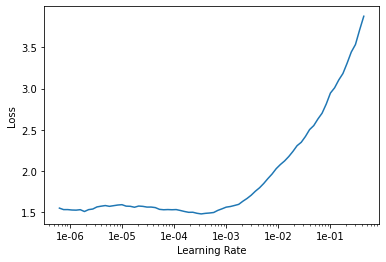

In [42]:
learn.recorder.plot()

In [49]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(.0006,.0004))

epoch,train_loss,valid_loss,error_rate,time
0,2.657899,6.476162,0.906122,00:47
1,2.754270,3.486204,0.749660,00:49


# Use resnet50

In [35]:
learnResnet50 = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/jpnelson/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [36]:
learnResnet50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


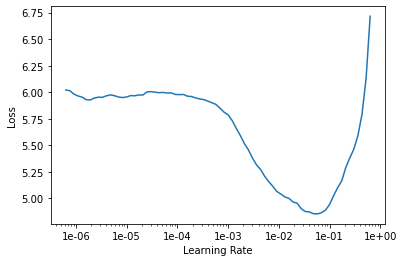

In [47]:
learnResnet50.recorder.plot()

In [50]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.969198,2.939564,0.665306,00:50
1,1.650799,2.904591,0.659864,00:52
2,1.440226,2.955145,0.638095,00:52
3,1.227172,2.989940,0.608163,00:50
4,1.004647,2.720116,0.561905,00:52
5,0.771980,2.545054,0.533333,00:52
6,0.574314,2.417101,0.522449,00:51
7,0.430180,2.387818,0.521088,00:52


In [52]:
learnResnet50.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,5.595074,6.895485,0.972789,00:48
1,4.292346,6.251946,0.946939,00:49
2,3.294654,4.393736,0.870748,00:51
3,2.559146,4.256450,0.825850,00:53
4,1.978928,4.224502,0.828571,00:49
5,1.531026,4.228082,0.814966,00:52
6,1.212641,4.204988,0.813605,00:51
7,0.977458,4.205492,0.813605,00:50


In [53]:
learnResnet50.save("/home/jpnelson/2020/jerms-writing/models/02020-03-27-cnn-res50")

In [54]:
learnResnet50.unfreeze()
learnResnet50.fit_one_cycle(3, max_lr=slice(.0006, .0004))

epoch,train_loss,valid_loss,error_rate,time
0,1.657431,6.716178,0.919728,01:04
1,2.232911,4.318785,0.761905,01:09
2,1.820386,2.969498,0.646259,01:09
